In [ ]:
!pip install geopandas
!pip install cartoframes
!pip install vt2geojson

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 31.6 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 
     |████████████████████████████████| 245 kB 5.3 MB/s 
     |████████████████████████████████| 235 kB 40.7 MB/s 
  Created wheel for carto: filename=carto-1.11.3-py3-none-any.whl size=35088 sha256=8526b57e571051fd549c512a9446745de394f017882993fc7caf55a46c5ef18a
  Stored in directory: /root/.cache/pip/wheels/5d/2c/92/3025882177e80975995f3157974effe445de29ac32000cadf2
  Created wheel for pyrestcli: filename=pyrestcli-0.6.11-py3-none-any.whl size=8496 sha256=d5a68aac9b469ed09eb834b19b96ab8cd9ac1babafcba7b1404561ef8f6a6dec
  Stored in directory: /root/.cache/pip/wheels/36/31/ea/2432077a49e8bd5346a5bf2d68a99306d33dc9fd08c3c75592
Successfully built carto pyrestcli
     |████████████████████████████████| 123 kB 7.9 MB/s 
  Created wheel for mapbox-vector-tile: filename=mapbox_vector_tile-1.2.1-py2.py3-none-any.whl size=32

In [ ]:
import pandas as pd
from geopandas import GeoDataFrame, points_from_xy
from shapely.geometry import Point, Polygon, LineString,box
import geopandas as gpd
import time
import requests
import json
from vt2geojson.tools import vt_bytes_to_geojson
import matplotlib.pyplot as plt
from cartoframes import read_carto, to_carto
from cartoframes.auth import set_default_credentials, Credentials
from cartoframes.viz import *
from cartoframes.data.services import Isolines
from cartoframes.data.observatory import Catalog, Dataset
from cartoframes.data.observatory import Enrichment

In [ ]:
import datetime

# Weather Data 
## Link - https://openweathermap.org/api
#### By city, geographic coordinates, zip code
### - Current Weather Data
### - Forecast Daily/Hourly Weather Data
### - Historical Weather Data
### potential prob: free access key get limited type of data

In [ ]:
# pip install cartoframes

In [ ]:
#title Your credentials
USER_NAME = 'usignite-intern' #@param {type:"string"}
API_KEY = '93ca9b2ca98129188e337d41aee1e0faad970acd' #@param {type:"string"}


set_default_credentials(
    username=USER_NAME,
    api_key=API_KEY
)

In [ ]:
## Gates Location
gates_gdf = gpd.read_file('gates.geojson')

### Current Data

In [ ]:
lat_lst = gates_gdf.geometry.y
lon_lst = gates_gdf.geometry.x
key = '4efcd12852204535b3cb9258ddf992eb'
weather_lst = []
temp_lst = []
visibility_lst = []
description_lst = []
temp_feel_lst = []

for i in range(7):
    url = 'http://api.openweathermap.org/data/2.5/weather?lat={}&lon={}&appid={}'.format(lat_lst[i],lon_lst[i], key)
    res = requests.get(url)
    data = res.json()
    weather_lst.append(data['weather'][0]['main'])
    description_lst.append(data['weather'][0]['description'])
    
    temp_lst.append(data['main']['temp'])
    temp_feel_lst.append(data['main']['feels_like'])
  
    visibility_lst.append(data['visibility'])

city = 'Colorado Springs'
key = '4efcd12852204535b3cb9258ddf992eb'
url = 'http://api.openweathermap.org/data/2.5/weather?q={}&appid={}'.format(city, key)

res = requests.get(url)
data = res.json()

gates_gdf['weather'] = weather_lst   
gates_gdf['description'] = description_lst   
gates_gdf['temperature'] = temp_lst  
gates_gdf['feels_like'] = temp_feel_lst  
gates_gdf['visibility'] = visibility_lst 

gates_gdf['humidity'] = data['main']['humidity']
gates_gdf['pressure'] = data['main']['pressure']
gates_gdf['wind_deg'] = data['wind']['deg']
gates_gdf['wind_speed'] = data['wind']['speed']

gates_gdf['visibility'] = gates_gdf['visibility']*0.000621371192
gates_gdf['temperature'] = round(1.8*(gates_gdf['temperature'] - 273) + 32,0)

In [ ]:
gates_gdf.head()

,Gate,geometry,weather,description,temperature,feels_like,visibility,humidity,pressure,wind_deg,wind_speed
0,gate_1,POINT (-104.80432 38.73837),Clear,clear sky,49.0,282.69,6.213712,53,1012,0,0
1,gate_2,POINT (-104.81693 38.71919),Clear,clear sky,49.0,282.34,6.213712,53,1012,0,0
2,gate_3,POINT (-104.80369 38.76362),Clear,clear sky,50.0,282.76,6.213712,53,1012,0,0
3,gate_4,POINT (-104.79363 38.76186),Clear,clear sky,50.0,282.75,6.213712,53,1012,0,0
4,gate_5,POINT (-104.77772 38.71436),Clear,clear sky,50.0,281.23,6.213712,53,1012,0,0


In [ ]:
# gates_gdf.to_csv('OpenWeather_DataSample.csv')

### City

In [ ]:
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

In [ ]:
# unix_time = '1632715200'
key = '4efcd12852204535b3cb9258ddf992eb'

url = 'https://api.openweathermap.org/data/2.5/weather?q={}&appid={}'.format('Pittsburg', key)

In [ ]:
city_lst = ['Pittsburg', 'New York', 'Boston']

for i in city_lst:
  url = 'https://api.openweathermap.org/data/2.5/weather?q={}&appid={}'.format(i, key)
  res = requests.get(url)
  data = res.json()

In [ ]:
data

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 42.3584, 'lon': -71.0598},
 'dt': 1634738895,
 'id': 4930956,
 'main': {'feels_like': 289.22,
  'humidity': 70,
  'pressure': 1013,
  'temp': 289.68,
  'temp_max': 291.67,
  'temp_min': 287.12},
 'name': 'Boston',
 'sys': {'country': 'US',
  'id': 2013408,
  'sunrise': 1634727781,
  'sunset': 1634766877,
  'type': 2},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
   'icon': '02d',
   'id': 801,
   'main': 'Clouds'}],
 'wind': {'deg': 324, 'gust': 7.6, 'speed': 3.58}}

In [ ]:
data['name']

'Boston'

### Historical Weather Data

In [ ]:
city = 'Colorado Springs'
key = '456aa8232b248955962e9063456822bd'
url = 'http://api.openweathermap.org/data/2.5/weather?q={}&appid={}'.format(city, key)

res = requests.get(url)
data = res.json()

In [ ]:
start_time = '1632974400'
end_time = '1633233600'

In [ ]:
url = "http://history.openweathermap.org/data/2.5/history/city?q={}&type=hour&start={}&end={}&appid={}".format(city, start_time, end_time, key)

In [ ]:
res = requests.get(url)
data = res.json()

In [ ]:
len(data)

6

In [ ]:
data['list'][0]

{'clouds': {'all': 90},
 'dt': 1632974400,
 'main': {'feels_like': 282.63,
  'humidity': 84,
  'pressure': 1020,
  'temp': 282.85,
  'temp_max': 285.84,
  'temp_min': 274.6},
 'weather': [{'description': 'overcast clouds',
   'icon': '04n',
   'id': 804,
   'main': 'Clouds'}],
 'wind': {'deg': 13, 'gust': 5.36, 'speed': 1.34}}

In [ ]:
data['list'][0]['wind']['speed']

1.34

In [ ]:
dt_lst = []
weather_description_lst = []
weather_main_lst = []
main_temp_lst = []
pressure_lst = []
humidity_lst = []
wind_speed_lst = []

for i in range(len(data['list'])):
  col = data['list'][i]
  t = datetime.datetime.fromtimestamp(col['dt'])
  dt_lst.append(t)
  weather_description_lst.append(col['weather'][0]['description'])
  weather_main_lst.append(data['list'][i]['weather'][0]['main'])
  main_temp_lst.append(data['list'][i]['main']['temp'])

  pressure_lst.append(col['main']['pressure'])
  humidity_lst.append(col['main']['humidity'])
  wind_speed_lst.append(col['wind']['speed'])

In [ ]:
df_wea = pd.DataFrame({'time': dt_lst, 'wea_description': weather_description_lst, 'main': weather_main_lst, 'temp': main_temp_lst,
                       'pressure':pressure_lst, 'humidity':humidity_lst, 'wind_speed':wind_speed_lst})

In [ ]:
df_wea

,time,wea_description,main,temp,pressure,humidity,wind_speed
0,2021-09-30 04:00:00,overcast clouds,Clouds,282.85,1020,84,1.34
1,2021-09-30 05:00:00,overcast clouds,Clouds,282.12,1021,86,0.45
2,2021-09-30 06:00:00,overcast clouds,Clouds,281.34,1022,86,0.89
3,2021-09-30 07:00:00,overcast clouds,Clouds,280.74,1023,86,0.89
4,2021-09-30 08:00:00,overcast clouds,Clouds,280.56,1023,85,0.45
...,...,...,...,...,...,...,...
68,2021-10-03 00:00:00,broken clouds,Clouds,290.58,1023,41,0.45
69,2021-10-03 01:00:00,broken clouds,Clouds,288.64,1023,46,0.45
70,2021-10-03 02:00:00,broken clouds,Clouds,287.59,1025,48,0.45
71,2021-10-03 03:00:00,scattered clouds,Clouds,286.48,1025,48,0.45


In [ ]:
df_wea.to_csv('Weather_data_newversion1004.csv')

In [ ]:
## Last five days weather data visualization 

Text(0.5, 1.0, "Five Day's wind_speed in colorado springs")

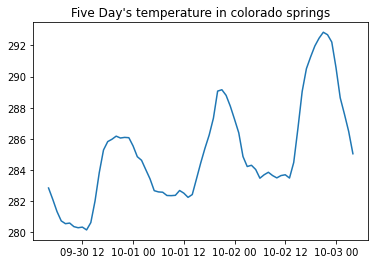

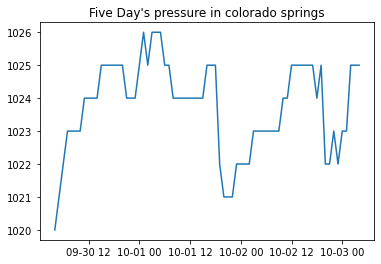

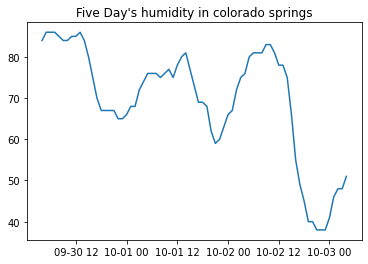

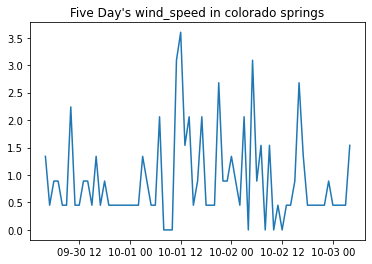

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
x = df_wea['time']
y = df_wea['temp']
z = df_wea['pressure']
h = df_wea['humidity']
s = df_wea['wind_speed']

plt.figure()
plt.plot(x,y)
plt.title("Five Day's temperature in colorado springs")

y = df_wea['temp']

plt.figure()
plt.plot(x,z)
plt.title("Five Day's pressure in colorado springs")

plt.figure()
plt.plot(x,h)
plt.title("Five Day's humidity in colorado springs")

plt.figure()
plt.plot(x,s)
plt.title("Five Day's wind_speed in colorado springs")

Text(0.5, 1.0, "Five Day's weather in colorado springs")

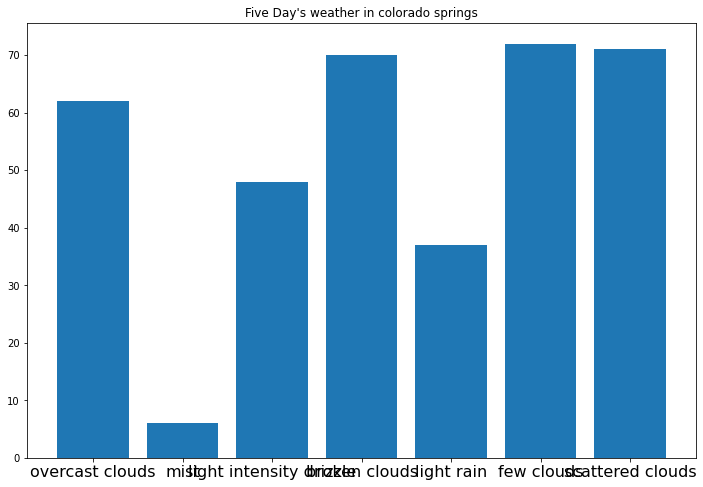

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
x = df_wea['wea_description']
# y = df_wea['temp']

plt.figure(figsize=(12, 8))
plt.xticks(fontsize=16) 
plt.bar(x, range(len(x)))
plt.title("Five Day's weather in colorado springs")

In [ ]:
import seaborn as sns

No handles with labels found to put in legend.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


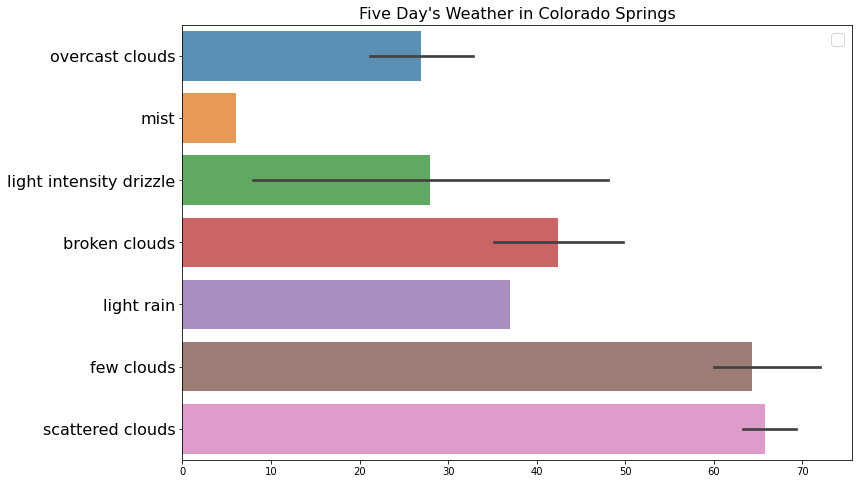

In [ ]:
# rating score distribution

# Get the distribution of the ratings
x = df_wea['wea_description']
x = x.sort_index()

# plot
plt.figure(figsize=(12,8))
plt.yticks(fontsize=16) 
plt.legend(fontsize=16)
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Five Day's Weather in Colorado Springs", fontsize = 16)
# plt.ylabel('Number of Restaurants', fontsize=12)
# plt.xlabel('Star Ratings', fontsize=12)

# # adding the text labels
# rects = ax.patches
# labels = x.values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

Text(0.5, 1.0, "Five Day's weather in colorado springs")

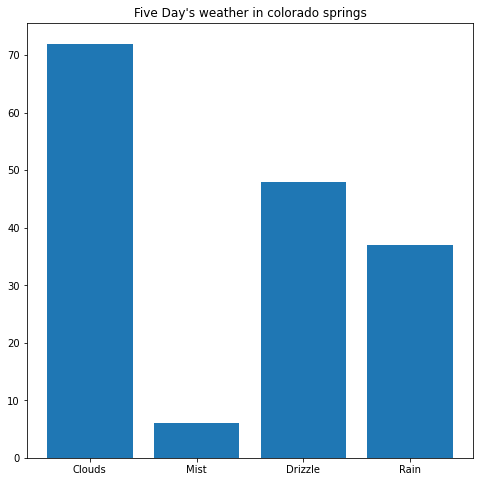

In [ ]:
x = df_wea['main']
# y = df_wea['temp']

plt.figure(figsize=(8, 8))
plt.bar(x, range(len(x)))
plt.title("Five Day's weather in colorado springs")

In [ ]:
### gates condition 

In [ ]:
lat_lst = gates_gdf.geometry.y
lon_lst = gates_gdf.geometry.x
unix_time = '1632715200'
key = '4efcd12852204535b3cb9258ddf992eb'

url = 'https://api.openweathermap.org/data/2.5/onecall/timemachine?lat={}&lon={}&dt={}&appid={}'.format(lat_lst[0],lon_lst[0], unix_time, key)

In [ ]:
res = requests.get(url)
data = res.json()

In [ ]:
data

{'cod': '400',
 'message': 'requested time is out of allowed range of 5 days back'}

# Flow Data
### LINK: https://developer.tomtom.com/content/traffic-api-explorer

In [ ]:
## test

In [ ]:
url_new = "https://api.tomtom.com/traffic/trafficstats/trafficdensity/1?key=STZ4RlsAAp9bLn7LP0iKyvf9EMWgy5CP"

In [ ]:
r = requests.get(url_new)

In [ ]:
##

In [ ]:
key = 'STZ4RlsAAp9bLn7LP0iKyvf9EMWgy5CP'

In [ ]:
def flow(x,y,z,type_flow,key):
    url = 'https://api.tomtom.com/traffic/map/4/tile/flow/{}/{}/{}/{}.pbf?roadTypes=%5B0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%5D&margin=0.05&tags=%5Broad_type%2Ctraffic_level%2Ctraffic_road_coverage%2Cleft_hand_traffic%2Croad_closure%5D&key={}'.format(type_flow,z,x,y,key)
    r = requests.get(url)
    features = vt_bytes_to_geojson(r.content,x,y,z)   
    return gpd.GeoDataFrame.from_features(features)

In [ ]:
area1_absolute = flow(427,784,11,'absolute',key).rename(columns={'traffic_level': 'speed'})
area2_absolute = flow(428,784,11,'absolute',key).rename(columns={'traffic_level': 'speed'})
area1_relative = flow(427,784,11,'relative',key).rename(columns={'traffic_level': 'speed_relative_to_freeflow'})
area2_relative = flow(428,784,11,'relative',key).rename(columns={'traffic_level': 'speed_relative_to_freeflow'})
traffic_absolute = area1_absolute.append(area2_absolute)
traffic_relative = area1_relative.append(area2_relative)
traffic_absolute['speed'] = traffic_absolute['speed'].apply(lambda x: round(x*0.621371,1))
traffic_relative['relative_speed_level'] = traffic_relative['speed_relative_to_freeflow'].apply(lambda x: 
                                                     'Very Slow' if x<0.25 else ('Slow' if x<0.5 else ('Medium' if x<0.75 else 'Fast')))

In [ ]:
traffic_absolute.head()

,geometry,road_type,speed,traffic_road_coverage,road_closure
0,"LINESTRING (-104.82991 38.81644, -104.83017 38...",Motorway,65.2,full,NaN
1,"MULTILINESTRING ((-104.83519 38.82944, -104.83...",Motorway,68.4,full,NaN
2,"MULTILINESTRING ((-104.81635 38.81416, -104.81...",Motorway,71.5,full,NaN
3,"MULTILINESTRING ((-104.75683 38.74859, -104.75...",Motorway,74.6,full,NaN
4,"LINESTRING (-104.83352 38.82741, -104.83523 38...",Major road,6.2,full,NaN


In [ ]:
traffic_relative

,geometry,road_type,speed_relative_to_freeflow,traffic_road_coverage,road_closure,relative_speed_level
0,"MULTILINESTRING ((-104.83519 38.82944, -104.83...",Motorway,1.000,full,NaN,Fast
1,"LINESTRING (-104.83352 38.82741, -104.83523 38...",Major road,0.529,full,NaN,Medium
2,"LINESTRING (-104.83764 38.82928, -104.83781 38...",Major road,0.606,full,NaN,Medium
3,"LINESTRING (-104.83515 38.82634, -104.83498 38...",Major road,0.648,full,NaN,Medium
4,"LINESTRING (-104.83060 38.81657, -104.83026 38...",Major road,0.682,full,NaN,Medium
...,...,...,...,...,...,...
36,"LINESTRING (-104.73026 38.80607, -104.73026 38...",Major local road,0.517,one_side,NaN,Medium
37,"LINESTRING (-104.76288 38.79082, -104.76279 38...",Major local road,0.634,one_side,NaN,Medium
38,"LINESTRING (-104.73035 38.79885, -104.73035 38...",Major local road,0.676,one_side,NaN,Medium
39,"LINESTRING (-104.75781 38.79651, -104.75859 38...",Major local road,0.790,one_side,NaN,Fast


In [ ]:
traffic_relative['geometry'][0]

0    MULTILINESTRING ((-104.83519 38.82944, -104.83...
0    MULTILINESTRING ((-104.77442 38.76345, -104.77...
Name: geometry, dtype: geometry

In [ ]:
traffic_relative.to_csv('TomTom_Flow_DataSample.csv')

# Incident Data

In [ ]:
def incidents(x1,y1,x2,y2,key):
    url = 'https://api.tomtom.com/traffic/services/4/incidentDetails/s3/{}%2C{}%2C{}%2C{}/11/-1/json?projection=EPSG4326&expandCluster=true&key={}'.format(x1,y1,x2,y2,key)
    r = requests.get(url)
    return json.loads(r.content)
data = incidents(38.699302,-104.842293,38.826745,-104.728730,key)

In [ ]:
# data[0]

In [ ]:
feature = {
    "type": "FeatureCollection",
    "features": [
    {
        "type": "Feature",
        "geometry" : {
            "type": "Point",
            "coordinates": [j['p']['x'], j['p']['y']],
            },
        "properties" : j 
     } for i in data['tm']['poi'] if 'cpoi' in i for j in i['cpoi'] ]
} 
feature1 = {
    "type": "FeatureCollection",
    "features": [
    {
        "type": "Feature",
        "geometry" : {
            "type": "Point",
            "coordinates": [j['p']['x'], j['p']['y']],
            },
        "properties" : j
     } for j in data['tm']['poi'] if 'cpoi' not in j]
}
feature2 = {
    "type": "FeatureCollection",
    "features": [
    {
        "type": "Feature",
        "geometry" : {
            "type": "Point",
            "coordinates": [j['p']['x'], j['p']['y']],
            },
        "properties" : {'id_c':i['id']}  
     } for i in data['tm']['poi'] if 'cpoi' in i for j in i['cpoi'] ]
} 
df_incidents = gpd.GeoDataFrame.from_features(feature)
df_incidents2 = gpd.GeoDataFrame.from_features(feature2)
df_incidents = df_incidents.merge(df_incidents2, on = 'geometry')
df_incidents1 = gpd.GeoDataFrame.from_features(feature1)
df_incidents = df_incidents.append(df_incidents1).reset_index()

In [ ]:
df_incidents = df_incidents.rename(columns={'id_c':'cluster_id','ic': 'category','ty':'magnitude_of_delay','cs':'num_incidents','l':'len_incidents',
                    'd':'description','c':'cause','sd':'start','ed':'end','f':'from_intersection_road',
                   't':'to_intersection_road','r':'num_affected_road'})
incidents = df_incidents.drop(['p','num_incidents'], axis=1)
incidents['category'] = incidents['category'].map({0: 'Unknown',1: 'Accident',2: 'Fog',3: 'Dangerous Conditions',
                                                         4: 'Rain',5: 'Ice', 6: 'Jam',7: 'Lane Closed',8: 'Road Closed',
                                                         9: 'Road Works',10: 'Wind',11: 'Flooding',12: 'Detour',
                                                         13:'multiple',14: 'Broken Down Vehicle'})
incidents['magnitude_of_delay'] = incidents['magnitude_of_delay'].map({0: 'Unknown',1: 'Minor',2: 'Moderate',
                                                                       3: 'Major', 4: 'road closures and other indefinite delays'})
incidents['len_incidents'] = incidents['len_incidents'].apply(lambda x: round(x*0.000621371,2))                                                                             
incidents.fillna('Unknown', inplace=True) 
incidents_cluster = incidents.groupby('cluster_id')['geometry'].apply(
    lambda x: Polygon(x.tolist()) if x.count()>2 else None).reset_index()

In [ ]:
incidents = incidents.rename(columns={'id_c':'cluster_id','ic': 'category','ty':'magnitude_of_delay','cs':'num_incidents','l':'len_incidents',
                    'd':'description','c':'cause','sd':'start','ed':'end','f':'from_intersection_road',
                   't':'to_intersection_road','r':'num_affected_road'})
incidents['category'] = incidents['category'].map({0: 'Unknown',1: 'Accident',2: 'Fog',3: 'Dangerous Conditions',
                                                         4: 'Rain',5: 'Ice', 6: 'Jam',7: 'Lane Closed',8: 'Road Closed',
                                                         9: 'Road Works',10: 'Wind',11: 'Flooding',12: 'Detour',
                                                         13:'multiple',14: 'Broken Down Vehicle'})
incidents['len_incidents'] = incidents['len_incidents'].apply(lambda x: round(x*0.000621371,2))                                                                             
incidents.fillna('Unknown', inplace=True)

In [ ]:
incidents.head(10)

,index,geometry,id,category,magnitude_of_delay,description,start,from_intersection_road,to_intersection_road,len_incidents,cause,end,cluster_id,num_affected_road,dl
0,0,POINT (-104.82033 38.82461),403d1554c462004ac3b5bb155f40bb32,Unknown,road closures and other indefinite delays,closed,2021-08-17T18:43:00Z,S Nevada Ave (E Cimarron St),S Wahsatch Ave/Pueblo Ave (E Cimarron St),0.0,Unknown,Unknown,CLUSTER_80160,Unknown,Unknown
1,1,POINT (-104.81875 38.82886),a676fb5c6f26e187fd7f990135d49258,Unknown,road closures and other indefinite delays,closed,2021-08-17T18:36:00Z,S Wahsatch Ave/Pueblo Ave (E Cimarron St),S Nevada Ave (E Cimarron St),0.0,Unknown,Unknown,CLUSTER_80160,Unknown,Unknown
2,2,POINT (-104.81831 38.82885),b106f23c4722b6e205aec3adb7374a97,Unknown,road closures and other indefinite delays,closed,2021-10-05T03:28:30Z,S Wahsatch Ave,S Nevada Ave,0.0,Unknown,Unknown,CLUSTER_80160,Unknown,Unknown
3,3,POINT (-104.81845 38.82671),9f3c243236546d4c86dbb0fb35f620cf,Unknown,road closures and other indefinite delays,closed,2021-09-30T18:31:30Z,E Cimarron St (S Wahsatch Ave),E Fountain Blvd (S Wahsatch Ave),0.0,Unknown,Unknown,CLUSTER_80160,Unknown,Unknown
4,4,POINT (-104.81620 38.83580),5a84a8b1e03168c206ba03ad68ab47e3,Unknown,road closures and other indefinite delays,closed,2021-09-24T20:10:00Z,S Hancock Ave (E Pikes Peak Ave),N Wahsatch Ave (E Pikes Peak Ave),0.0,Unknown,Unknown,CLUSTER_80160,Unknown,Unknown
5,5,POINT (-104.81287 38.83853),f81203977d7aec8dde4fe2a807f63ef7,Unknown,road closures and other indefinite delays,closed,2021-08-28T00:23:00Z,E Boulder St,E Bijou St,0.0,Unknown,Unknown,CLUSTER_80160,Unknown,Unknown
6,6,POINT (-104.78998 38.79352),73fcb0860b3941543ef41aabacc0d5ca,Unknown,road closures and other indefinite delays,closed,2021-10-06T15:55:10Z,Janitell Rd,Janitell Rd,0.0,roadworks,2021-10-14T05:59:00Z,CLUSTER_80163,Unknown,Unknown
7,7,POINT (-104.78940 38.78542),b4cfc6c37e00830f00e3c706b178e75e,Unknown,road closures and other indefinite delays,closed,2021-10-09T21:37:30Z,I-25 N / S Academy Blvd,Executive Cir,0.0,Unknown,Unknown,CLUSTER_80163,Unknown,Unknown
8,8,POINT (-104.78933 38.78417),678d440761e0c921e651c772a57bb4f2,Unknown,road closures and other indefinite delays,closed,2021-10-05T00:18:30Z,S US Highway 85 87 / Venetucci Blvd,S Academy Blvd,0.0,Unknown,Unknown,CLUSTER_80163,Unknown,Unknown
9,9,POINT (-104.73687 38.73430),dfac02e5b9f55df00c006e2d79fafa75,Unknown,road closures and other indefinite delays,closed,2020-09-16T11:23:48Z,Paladin Pl,Puerta Rd,0.0,Unknown,Unknown,CLUSTER_80174,Unknown,Unknown


In [ ]:
incidents.to_csv('TomTom_Incidents_DataSample.csv')